# *Lecture 21*

# Partial Differential Equations: Applications in Electrostatics

| |
|:---:|
|Selected Content [From **COMPUTATIONAL PHYSICS**, 3rd Ed, 2015](http://physics.oregonstate.edu/~rubin/Books/CPbook/index.html) <br>RH Landau, MJ Paez, and CC Bordeianu (deceased) <br>Copyrights: <br> [Wiley-VCH, Berlin;](http://www.wiley-vch.de/publish/en/books/ISBN3-527-41315-4/) and [Wiley & Sons, New York](http://www.wiley.com/WileyCDA/WileyTitle/productCd-3527413154.html)<br>  R Landau, Oregon State Unv, <br>MJ Paez, Univ Antioquia,<br> C Bordeianu, Univ Bucharest, 2015.<br> Support by National Science Foundation.|

## Application: Electrostatic Potential

We focused on the solution for an electrostatic potential $U$, as defined by Laplace's equation (no charges: $\rho=0$).

$$\nabla^2 U(\textbf{x}) = 0$$

Our example problem was to find the electric potential for all points
inside the charge-free square shown below. 

<img src="Figures/Figure_19.1a.png" width="20%">

To proceed with our multi-dimensional numerical methods, we rewrote the equation in a convenient coordinate system.  For the square system, we wrote the equation in 2-D rectangular coordinates:

$$\frac{\partial^2 U(x,y)}{\partial x^2}+ \frac{\partial^2
U(x,y)}{\partial y^2 } = - 4 \pi \rho(\textbf{x})$$

## Laplace's Equation in Other Geometries

The rectangular coordinate system provides a natural grid of discrete points, but it is not convenient if the boundary does not conform to the grid.
For example, if the boundary is a circle, it may be more convenient to use *polar coordinates*.
The nature of our iterative method still requires a structured grid, with well-defined neighbors around $(i,j)$ at $(i+1,j)$, $(i,j+1)$, etc.
For this reason, we map the polar coordinate values onto a structured rectangular grid, as shown in the figure.

<img src="Figures/Polar_Coordinate_Mapping.png" width="60%">

In the mapping:
$$\begin{cases}
x = r \cos\theta \\
y = r \sin\theta
\end{cases}$$

We can find that 
$$\frac{\partial^2 U}{\partial x^2} + \frac{\partial^2 U}{\partial y^2} = \frac{\partial^2 U}{\partial r^2} + \frac{1}{r} \frac{\partial U}{\partial r} + \frac{1}{r^2} \frac{\partial^2 U}{\partial \theta^2}$$

Therefore, Laplace's equation in polar coordinates is 

$$\boxed{\frac{\partial^2 U}{\partial r^2} + \frac{1}{r} \frac{\partial U}{\partial r} + \frac{1}{r^2} \frac{\partial^2 U}{\partial \theta^2} = 0}$$

We have two second derivatives, one each in $r$ and $\theta$, that can be approximated with the midpoint algorithm.
And we have one first derivative in $r$ that can be approximated by a central difference algorithm.
When we write the finite differences, we have to be very careful about the interval spacing.  It is simplest to keep the intervals in $r$ and $\theta$ completely separate.
We assume that the indices are written for grid points $(r_i, \theta_j)$.

$$\begin{align}
\frac{\partial^2 U}{\partial r^2} &= \frac{U_{i-1,j} - 2U_{i,j} + U_{i+1,j}}{(\Delta r)^2} \\
\frac{1}{r^2} \frac{\partial^2 U}{\partial \theta^2} &= \frac{1}{r_i^2} \frac{U_{i,j-1} - 2U_{i,j} + U_{i,j+1}}{(\Delta \theta)^2} \\
\frac{1}{r} \frac{\partial U}{\partial r} &= \frac{1}{r_i} \frac{U_{i+1,j} - U_{i-1,j}}{2\Delta r} \\
\end{align}$$

We are not done yet! Now we need to solve for $U_{i,j}$:

$$\left( \frac{2}{(\Delta r)^2} + \frac{2}{r^2 (\Delta \theta)^2} \right) U_{i,j} = 
\frac{U_{i-1, j} + U_{i+1,j}}{(\Delta r)^2} + \frac{U_{i, j-1} + U_{i, j+1}}{r_i^2 (\Delta \theta)^2}
+ \frac{U_{i+1,j} - U_{i-1, j}}{2r_i \Delta r}$$

$$U_{i,j} = \left( \frac{2}{(\Delta r)^2} + \frac{2}{r^2 (\Delta \theta)^2} \right)^{-1} 
\left[ \frac{U_{i-1, j} + U_{i+1,j}}{(\Delta r)^2} + \frac{U_{i, j-1} + U_{i, j+1}}{r_i^2 (\Delta \theta)^2}
+ \frac{U_{i+1,j} - U_{i-1, j}}{2r_i \Delta r}\right]$$

We will use the Jacobi method for this program, so that all of the grid points with same $r$ but different $\theta$ will get the same value for each iteration.  (If we use the Gauss-Seidel method, the points with large $\theta$ values will have neighbor values that changed earlier in the iteration.)

Also, since $\theta$ is periodic, we must take special care with the neighbors of the points at the beginning and end of the $\theta$ range.
This is accomplished with special cases for $j=0$ and $j=Nmax-1$.

<IPython.core.display.Javascript object>


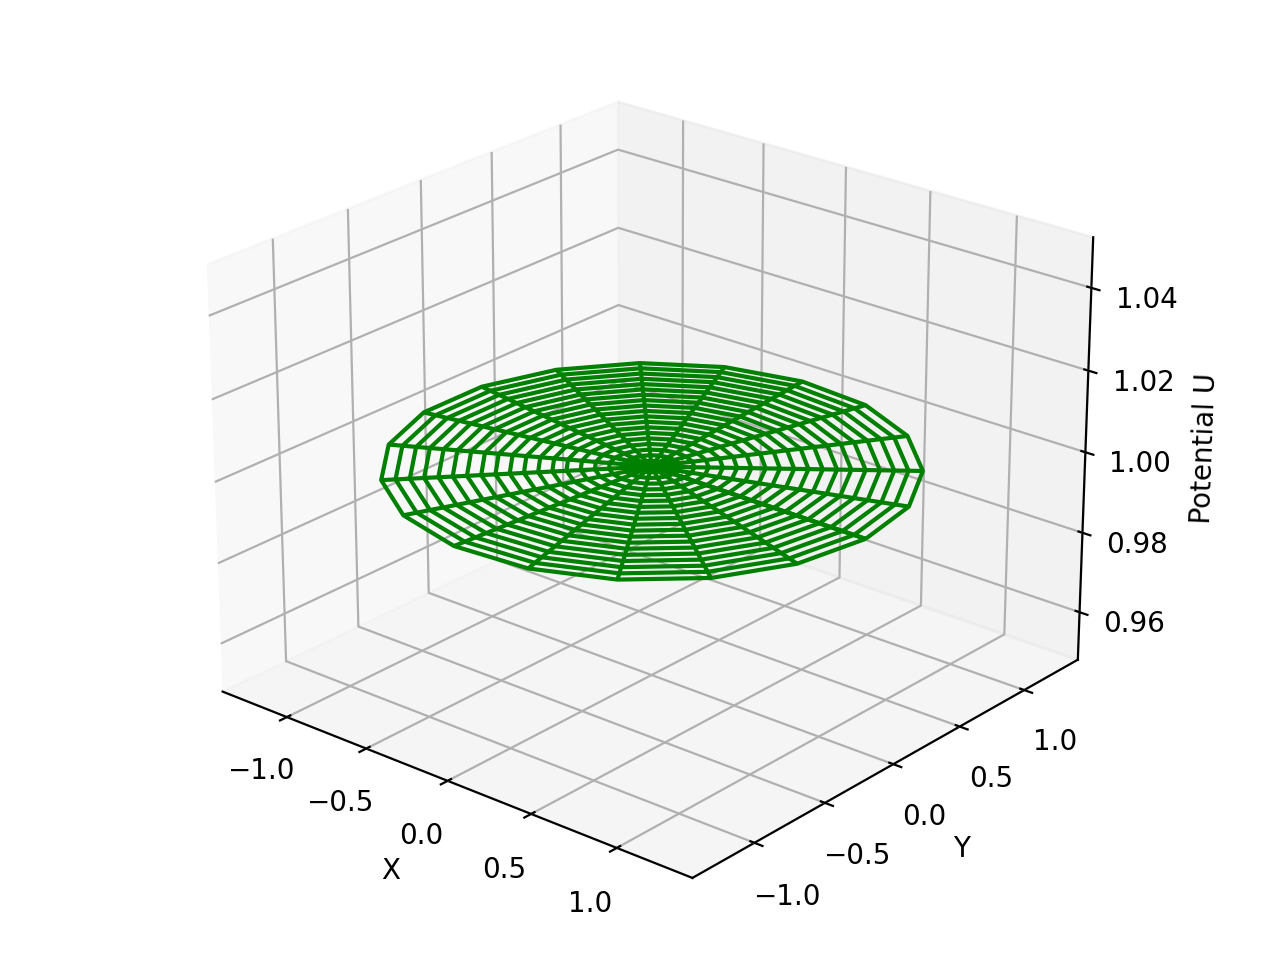

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

# Poisson's equation

Nmax = 20
Niter = 200
V = np.ones((Nmax, Nmax))   

(r, r_step) = np.linspace(0, 1.25, Nmax, retstep=True)
(theta, theta_step) = np.linspace(0, 2*np.pi, Nmax, retstep=True)
R, P = np.meshgrid(r, theta)

for k in range(0, Nmax): 
    V[Nmax-1,k] = 1.0                              # fixed potential line at 1V
    
for iter in range(Niter):                       # iterations over algorithm
    #print(V)
    old_V = V.copy()
    for i in range(1, Nmax-1):   
        denom = 2./pow(r_step,2) + 2./pow(r[i],2)/pow(theta_step,2)
        j = 0
        V[i,j] = ((old_V[i-1,j]+old_V[i+1,j])/pow(r_step,2) + 
                  (old_V[i+1,j]-old_V[i-1,j])/r[i]/(2*r_step) + 
                  (old_V[i,-1]+old_V[i,j+1])/pow(r[i],2)/pow(theta_step,2))/denom
        for j in range(1,Nmax-1):
            V[i,j] = ((old_V[i-1,j]+old_V[i+1,j])/pow(r_step,2) + 
                      (old_V[i+1,j]-old_V[i-1,j])/r[i]/(2*r_step) + 
                      (old_V[i,j-1]+old_V[i,j+1])/pow(r[i],2)/pow(theta_step,2))/denom
        j = Nmax-1
        V[i,j] = ((old_V[i-1,j]+old_V[i+1,j])/pow(r_step,2) + 
                  (old_V[i+1,j]-old_V[i-1,j])/r[i]/(2*r_step) + 
                  (old_V[i,j-1]+old_V[i,0])/pow(r[i],2)/pow(theta_step,2))/denom

x = range(0, Nmax)
y = range(0, Nmax)
X, Y = np.meshgrid(x,y)          

def functz(V):                                  # Function returns V(x, y)
    z = V[X,Y]                        
    return z

Z = functz(V)
              
# Transform back to rectangular coordinates for plotting
X, Y = R*np.cos(P), R*np.sin(P)

fig = plt.figure()                              # Create figure
ax = Axes3D(fig, auto_add_to_figure=False)      # Plots axes
fig.add_axes(ax)
ax.plot_wireframe(X, Y, Z, color = 'g')         
ax.set_xlabel('X')                              # label axes
ax.set_ylabel('Y')
ax.set_zlabel('Potential U')
plt.show()  

Some questions to consider:
* Does this result match your intuition?
* Why should the potential be exactly 1.0 everywhere?
* Does it mean that we haven't reached convergence?

In the equation

$$U_{i,j} = \left( \frac{2}{(\Delta r)^2} + \frac{2}{r^2 (\Delta \theta)^2} \right)^{-1} 
\left[ \frac{U_{i-1, j} + U_{i+1,j}}{(\Delta r)^2} + \frac{U_{i, j-1} + U_{i, j+1}}{r_i^2 (\Delta \theta)^2}
+ \frac{U_{i+1,j} - U_{i-1, j}}{2r_i \Delta r}\right],$$

remember that the values "wrap around" the cylinder in $\theta$ but not in $r$.

The treatment of the $r=0$ point and its neighbors can be tricky.
In the following example, we set the conditions at $r=0$ and its neighbors by hand, and then we skip the iteration for the point(s) with $r=0$.

<IPython.core.display.Javascript object>


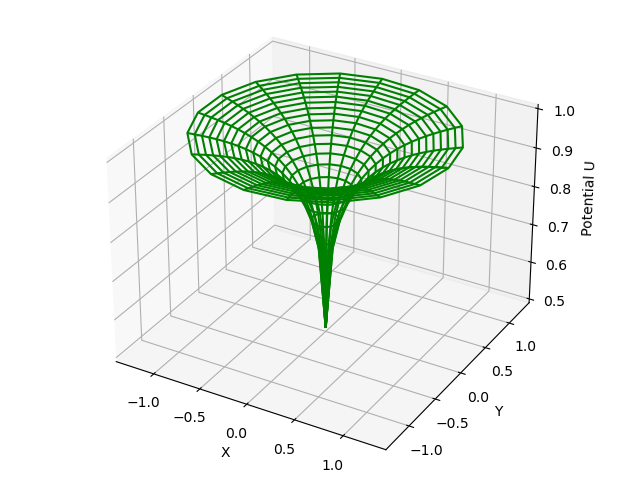

In [3]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

Nmax = 20
Niter = 100
V = np.ones((Nmax, Nmax))   

(r, r_step) =         np.linspace(0, 1.25, Nmax, retstep=True)
(theta, theta_step) = np.linspace(0, 2*np.pi, Nmax, retstep=True)
R, P = np.meshgrid(r, theta)

for k in range(0, Nmax): 
    V[Nmax-1,k] = 1.0       # fixed potential at boundary
    V[1,k] = 0.0            # fixed potential near center
    V[0,k] = 0.5            # fixed potential at r=0
    
for iter in range(Niter):   # iterations over algorithm
    #print(V)
    old_V = V.copy()
    for i in range(1, Nmax-1):   
        denom = 2./pow(r_step,2) + 2./pow(r[i],2)/pow(theta_step,2)
        j = 0
        V[i,j] = ((old_V[i-1,j]+old_V[i+1,j])/pow(r_step,2) + 
                  (old_V[i+1,j]-old_V[i-1,j])/r[i]/(2*r_step) + 
                  (old_V[i,-1]+old_V[i,j+1])/pow(r[i],2)/pow(theta_step,2))/denom
        for j in range(1,Nmax-1):
            V[i,j] = ((old_V[i-1,j]+old_V[i+1,j])/pow(r_step,2) + 
                      (old_V[i+1,j]-old_V[i-1,j])/r[i]/(2*r_step) + 
                      (old_V[i,j-1]+old_V[i,j+1])/pow(r[i],2)/pow(theta_step,2))/denom
        j = Nmax-1
        V[i,j] = ((old_V[i-1,j]+old_V[i+1,j])/pow(r_step,2) + 
                  (old_V[i+1,j]-old_V[i-1,j])/r[i]/(2*r_step) + 
                  (old_V[i,j-1]+old_V[i,0])/pow(r[i],2)/pow(theta_step,2))/denom

x = range(0, Nmax)
y = range(0, Nmax)
X, Y = np.meshgrid(x,y)          

def functz(V):                                  # Function returns V(x, y)
    z = V[X,Y]                        
    return z

Z = functz(V)
              
# Transform back to rectangular coordinates for plotting
X, Y = R*np.cos(P), R*np.sin(P)

fig = plt.figure()                              # Create figure
ax = Axes3D(fig, auto_add_to_figure=False)      # Plots axes
fig.add_axes(ax)
ax.plot_wireframe(X, Y, Z, color = 'g')         
ax.set_xlabel('X')                              # label axes
ax.set_ylabel('Y')
ax.set_zlabel('Potential U')
plt.show()  